In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from lob_data_utils.roc_results import results_10000 as results
from lob_data_utils import lob

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    if r.get('data_length') == 10000:
        svm = r.get('algorithm').get('svm')
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'gamma': svm.get('gamma'),
            'coef0': svm.get('coef0'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
len(df)

32324

In [4]:
log_res = []
for i, row in df.iterrows():
    log_res.append(results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [5]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] < df['roc_auc_score']]['stock'].unique()))

53
53


In [6]:
df[df['log_res'] <= df['roc_auc_score']]

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff
120,0.500,0.0,0.5000,rbf,0.562076,10166,0.561092,9.840630e-04
128,0.500,0.0,5.0000,rbf,0.561092,10166,0.561092,4.440892e-16
136,0.500,0.0,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
178,5.000,0.0,5.0000,rbf,0.561092,10166,0.561092,4.440892e-16
186,5.000,0.0,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
227,50.000,0.0,5.0000,rbf,0.561092,10166,0.561092,4.440892e-16
235,50.000,0.0,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
284,500.000,0.0,50.0000,rbf,0.562060,10166,0.561092,9.680620e-04
391,0.005,0.0,-1.0000,linear,0.559418,9061,0.557542,1.876689e-03
407,0.500,0.0,0.0050,rbf,0.560084,9061,0.557542,2.542288e-03


In [7]:
df.groupby('stock').aggregate({'roc_auc_score': np.max}).head()

,roc_auc_score
stock,
10166,0.562580
10484,0.558058
10508,0.574945
10887,0.568068
1113,0.574734


In [8]:
bests = []
df_best_agg = df.groupby('stock', as_index=False)['diff'].idxmax()
df_bests = df.loc[df_best_agg]
df_bests.index = df_bests['stock']

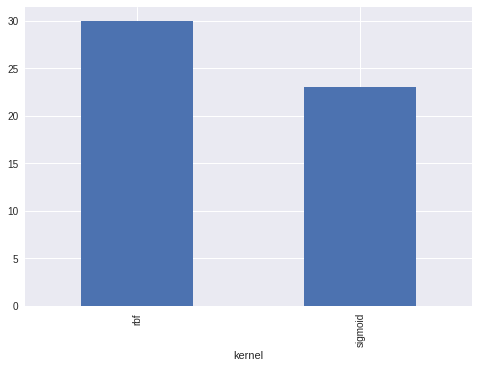

In [9]:
df_bests.groupby('kernel')['kernel'].count().plot(kind='bar')

In [10]:
df_bests.groupby(['kernel', 'stock'])['kernel'].unique()

kernel   stock
rbf      10166        [rbf]
         1113         [rbf]
         11244        [rbf]
         11867        [rbf]
         12417        [rbf]
         13003        [rbf]
         13061        [rbf]
         1388         [rbf]
         1431         [rbf]
         1472         [rbf]
         1956         [rbf]
         2651         [rbf]
         2813         [rbf]
         3035         [rbf]
         3161         [rbf]
         4799         [rbf]
         9061         [rbf]
         9062         [rbf]
         9064         [rbf]
         9065         [rbf]
         9067         [rbf]
         9069         [rbf]
         9086         [rbf]
         9094         [rbf]
         9265         [rbf]
         9266         [rbf]
         9268         [rbf]
         9269         [rbf]
         9270         [rbf]
         9761         [rbf]
sigmoid  10484    [sigmoid]
         10508    [sigmoid]
         10887    [sigmoid]
         11583    [sigmoid]
         11869    [sigmoid]
     

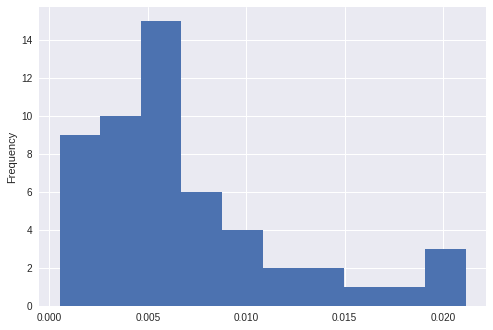

In [11]:
df_bests['diff'].plot(kind='hist')

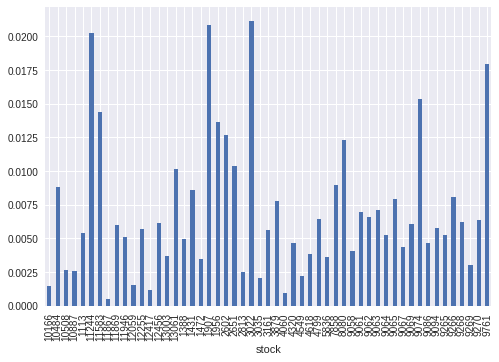

In [12]:
df_bests['diff'].plot(kind='bar')

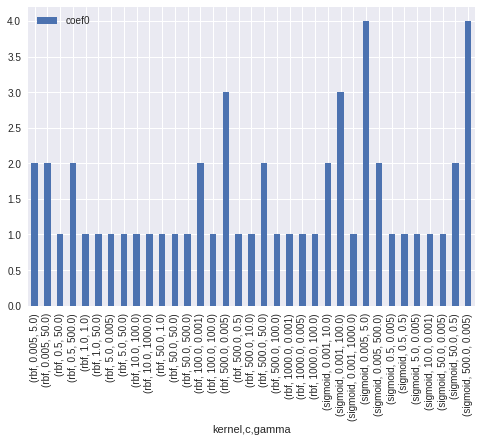

In [13]:
df_bests.groupby(['kernel', 'c', 'gamma'])[['coef0']].count().plot(kind='bar')

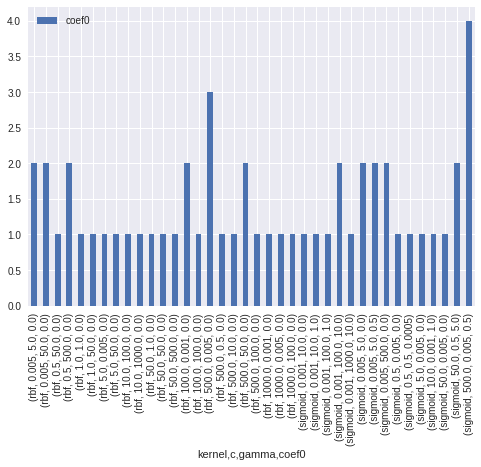

In [14]:
df_bests.groupby(['kernel', 'c', 'gamma', 'coef0'])[['coef0']].count().plot(kind='bar')

In [15]:
# TODO: mean square error by kernel for the bests? or for all


In [16]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].median())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].median())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].median())

0.005711596308425548
0.006006222518628368
nan


In [17]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].std())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].std())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].std())

0.004472290370416388
0.005808900021156363
nan


In [18]:
print(df_bests[df_bests['kernel'] == 'rbf']['diff'].mean())
print(df_bests[df_bests['kernel'] == 'sigmoid']['diff'].mean())
print(df_bests[df_bests['kernel'] == 'linear']['diff'].mean())

0.006490005533622644
0.00775629806911132
nan


In [19]:
print(df_bests[df_bests['kernel'] == 'rbf'][df_bests['diff'] < 0]['diff'].mean())
print(df_bests[df_bests['kernel'] == 'sigmoid'][df_bests['diff'] < 0]['diff'].mean())
print(df_bests[df_bests['kernel'] == 'linear'][df_bests['diff'] < 0]['diff'].mean())

nan
nan
nan


In [20]:
print(df_bests[df_bests['kernel'] == 'rbf'][df_bests['diff'] < 0]['diff'].min())
print(df_bests[df_bests['kernel'] == 'sigmoid'][df_bests['diff'] < 0]['diff'].min())
print(df_bests[df_bests['kernel'] == 'linear'][df_bests['diff'] < 0]['diff'].min())

nan
nan
nan


In [21]:
df_roc = pd.DataFrame()
df_roc['stock'] = results.keys()
df_roc['roc_area'] = results.values()

df_roc = df_roc.sort_values(by='roc_area', ascending=False)

dfs = {}
dfs_test = {}
dfs_cv = {}
stocks = df_roc['stock'].values

for s in stocks:
    d, d_cv, d_test = lob.load_prepared_data(
        s, cv=True, data_dir='../data/prepared/', length=10000)
    if not np.any(d):
        continue
    dfs[s] = d
    dfs_cv[s] = d_cv
    dfs_test[s] = d_test
stocks = list(dfs.keys())

Len of data for  2028 is 6279
Not enough data for 2028 actual len: 6279, wanted len: 10000
Len of data for  12098 is 5986
Not enough data for 12098 actual len: 5986, wanted len: 10000
Len of data for  12552 is 9049
Not enough data for 12552 actual len: 9049, wanted len: 10000
Len of data for  1221 is 6355
Not enough data for 1221 actual len: 6355, wanted len: 10000
Len of data for  3459 is 7639
Not enough data for 3459 actual len: 7639, wanted len: 10000
Len of data for  2748 is 5489
Not enough data for 2748 actual len: 5489, wanted len: 10000
Len of data for  10795 is 7492
Not enough data for 10795 actual len: 7492, wanted len: 10000
Len of data for  4154 is 5737
Not enough data for 4154 actual len: 5737, wanted len: 10000
Len of data for  4851 is 5527
Not enough data for 4851 actual len: 5527, wanted len: 10000
Len of data for  3757 is 7298
Not enough data for 3757 actual len: 7298, wanted len: 10000
Len of data for  10470 is 9612
Not enough data for 10470 actual len: 9612, wanted le

Len of data for  9065 is 12884
Training set length for 9065: 6000
Testing set length for 9065: 2000
Cross-validation set length for 9065: 2000
Len of data for  4320 is 11726
Training set length for 4320: 6000
Testing set length for 4320: 2000
Cross-validation set length for 4320: 2000
Len of data for  1472 is 14163
Training set length for 1472: 6000
Testing set length for 1472: 2000
Cross-validation set length for 1472: 2000
Len of data for  11869 is 10567
Training set length for 11869: 6000
Testing set length for 11869: 2000
Cross-validation set length for 11869: 2000
Len of data for  10166 is 15876
Training set length for 10166: 6000
Testing set length for 10166: 2000
Cross-validation set length for 10166: 2000
Len of data for  5836 is 10892
Training set length for 5836: 6000
Testing set length for 5836: 2000
Cross-validation set length for 5836: 2000
Len of data for  12456 is 12014
Training set length for 12456: 6000
Testing set length for 12456: 2000
Cross-validation set length for

In [22]:
df_roc = pd.DataFrame()
df_roc['stock'] = [s for s in results.keys() if s in stocks]
df_roc['roc_area'] = [results[s] for s in results.keys() if s in stocks]
df_roc = df_roc.sort_values(by='roc_area', ascending=False)
df_roc.head()

,stock,roc_area
25,3035,0.584046
28,4799,0.583429
12,1956,0.580344
33,9268,0.580335
50,11946,0.578842


In [105]:
df_summary = pd.DataFrame(index=stocks)
sum_sell_ask_mean = []
sum_buy_bid_mean = []
max_trade_price = []
min_trade_price = []
bid_ask_spread = []
bid_len = []
ask_len = []
sum_len_ask = []
sum_len_bid = []
mean_queue_imb = []

for s in stocks:
    sum_sell_ask_mean.append(dfs[s]['sum_sell_ask'].mean())
    sum_buy_bid_mean.append(dfs[s]['sum_buy_bid'].mean())
    max_trade_price.append(max( dfs[s]['bid_price'].max(), dfs[s]['ask_price'].max()))
    min_trade_price.append(max( dfs[s]['bid_price'].min(), dfs[s]['ask_price'].min()))
    bid_ask_spread.append((dfs[s]['ask_price'] - dfs[s]['bid_price']).mean())
    max_len_bid = 0
    max_len_ask = 0
    sum_bid = 0
    sum_ask = 0
    for i, row in dfs[s].iterrows():
        sum_bid += len(row['bid'])
        sum_ask += len(row['ask'])
        if len(row['bid']) > max_len_bid:
            max_len_bid = len(row['bid'])
        if len(row['ask']) > max_len_ask:
            max_len_ask = len(row['ask'])
    bid_len.append(max_len_bid)
    ask_len.append(max_len_ask)
    sum_len_ask.append(sum_bid)
    sum_len_bid.append(sum_ask)
    mean_queue_imb.append(dfs[s]['queue_imbalance'].std())
df_summary['roc_area'] = df_roc['roc_area'].values
df_summary['sum_sell_ask_mean'] = sum_sell_ask_mean
df_summary['sum_buy_bid_mean'] = sum_buy_bid_mean
df_summary['diff_mean_bid_ask'] = df_summary['sum_sell_ask_mean'] - df_summary['sum_buy_bid_mean']
df_summary['max_trade_price'] = max_trade_price
df_summary['min_trade_price'] = min_trade_price
df_summary['diff_trade_price'] = df_summary['max_trade_price'] - df_summary['min_trade_price']
df_summary['bid_ask_spread'] = bid_ask_spread
df_summary['len_ask'] = ask_len
df_summary['len_bid'] = bid_len
df_summary['sum_len_ask'] = sum_len_ask
df_summary['sum_len_bid'] = sum_len_bid
df_summary['mean_sum_len_ask_bid'] = (np.array(sum_len_ask) + np.array(sum_len_bid)) / 2
df_summary['mean_queue_imb'] = (df_summary['diff_trade_price'] + df_summary['bid_ask_spread']) / (mean_queue_imb)

df_summary.sort_values(by='bid_ask_spread')[df_summary['roc_area'] >= 0.58].head()


,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,len_ask,len_bid,sum_len_ask,sum_len_bid,mean_sum_len_ask_bid,mean_queue_imb
1956,0.580344,7440.167167,8133.749667,-693.582500,306.4,273.4,33.0,0.153583,1040,846,3863162,4317714,4090438.0,60.910014
3035,0.584046,6137.580500,5560.049667,577.530833,262.0,235.9,26.1,0.194967,810,717,2923053,3294755,3108904.0,49.845011
9268,0.580335,4857.602000,4769.154833,88.447167,1272.5,1149.0,123.5,0.642067,1336,1230,5531043,6212953,5871998.0,240.143712
4799,0.583429,1280.420167,1424.858167,-144.438000,1166.0,900.0,266.0,1.679417,1225,1055,4230588,5415065,4822826.5,507.166927


In [106]:
df_bests.sort_index(inplace=True)
df_summary.sort_index(inplace=True)
df_all = df_bests.join(df_summary)
diff_ind = []
for i, r in df_bests.iterrows():
    if r['diff'] <= 0:
        diff_ind.append(0)
    else:
        diff_ind.append(1)
df_all['diff_ind'] = diff_ind

In [107]:
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,min_trade_price,diff_trade_price,bid_ask_spread,len_ask,len_bid,sum_len_ask,sum_len_bid,mean_sum_len_ask_bid,mean_queue_imb,diff_ind
stock,,,,,,,,,,,,,,,,,,,,,
10166,500.000,0.0000,100.000,rbf,0.562580,10166,0.561092,0.001488,0.561092,800.550333,...,2968.5,486.0,1.195917,1222,1446,5952811,4985400,5469105.5,951.170098,1
10484,0.500,0.0005,0.500,sigmoid,0.558058,10484,0.549233,0.008825,0.549233,2717.582500,...,316.2,42.2,0.288167,740,682,2853469,2753098,2803283.5,80.266697,1
10508,0.005,0.0000,5.000,sigmoid,0.574945,10508,0.572313,0.002632,0.572313,3710.705500,...,341.3,37.5,0.241700,719,817,3507953,2986012,3246982.5,69.713472,1
10887,50.000,5.0000,0.500,sigmoid,0.568068,10887,0.565510,0.002558,0.565510,4167.200333,...,307.8,41.0,0.235467,993,998,3723329,3826633,3774981.0,77.111672,1
1113,500.000,0.0000,0.005,rbf,0.574734,1113,0.569331,0.005403,0.569331,2434.107500,...,806.5,126.0,0.977417,878,837,3578158,3626389,3602273.5,235.820718,1


In [108]:
df_summary.head()

,roc_area,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,len_ask,len_bid,sum_len_ask,sum_len_bid,mean_sum_len_ask_bid,mean_queue_imb
10166,0.561092,800.550333,860.828500,-60.278167,3454.5,2968.5,486.0,1.195917,1222,1446,5952811,4985400,5469105.5,951.170098
10484,0.549233,2717.582500,2810.821333,-93.238833,358.4,316.2,42.2,0.288167,740,682,2853469,2753098,2803283.5,80.266697
10508,0.572313,3710.705500,3863.016500,-152.311000,378.8,341.3,37.5,0.241700,719,817,3507953,2986012,3246982.5,69.713472
10887,0.565510,4167.200333,4040.129500,127.070833,348.8,307.8,41.0,0.235467,993,998,3723329,3826633,3774981.0,77.111672
1113,0.569331,2434.107500,2567.935000,-133.827500,932.5,806.5,126.0,0.977417,878,837,3578158,3626389,3602273.5,235.820718


In [109]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["sigmoid", "linear", "rbf"])
df_all['kernel_class'] = le.transform(df_all['kernel'])
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,diff_trade_price,bid_ask_spread,len_ask,len_bid,sum_len_ask,sum_len_bid,mean_sum_len_ask_bid,mean_queue_imb,diff_ind,kernel_class
stock,,,,,,,,,,,,,,,,,,,,,
10166,500.000,0.0000,100.000,rbf,0.562580,10166,0.561092,0.001488,0.561092,800.550333,...,486.0,1.195917,1222,1446,5952811,4985400,5469105.5,951.170098,1,1
10484,0.500,0.0005,0.500,sigmoid,0.558058,10484,0.549233,0.008825,0.549233,2717.582500,...,42.2,0.288167,740,682,2853469,2753098,2803283.5,80.266697,1,2
10508,0.005,0.0000,5.000,sigmoid,0.574945,10508,0.572313,0.002632,0.572313,3710.705500,...,37.5,0.241700,719,817,3507953,2986012,3246982.5,69.713472,1,2
10887,50.000,5.0000,0.500,sigmoid,0.568068,10887,0.565510,0.002558,0.565510,4167.200333,...,41.0,0.235467,993,998,3723329,3826633,3774981.0,77.111672,1,2
1113,500.000,0.0000,0.005,rbf,0.574734,1113,0.569331,0.005403,0.569331,2434.107500,...,126.0,0.977417,878,837,3578158,3626389,3602273.5,235.820718,1,1


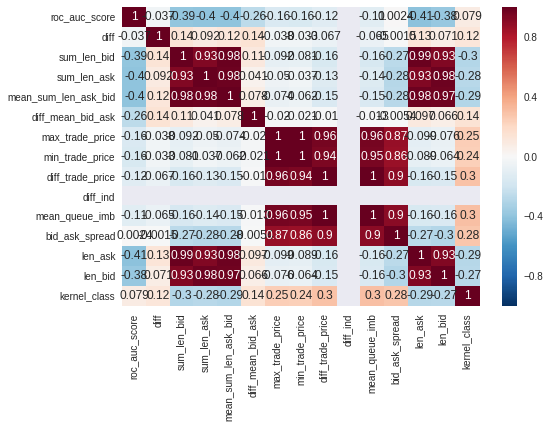

In [110]:
features = ['roc_auc_score', 'diff', 'sum_len_bid', 'sum_len_ask', 'mean_sum_len_ask_bid',
            'diff_mean_bid_ask', 'max_trade_price', 'min_trade_price',
            'diff_trade_price', 'diff_ind', 'mean_queue_imb',
            'bid_ask_spread', 'len_ask', 'len_bid', 'kernel_class']
# TODO: maybe some metric of queue_imbalance!
sns.heatmap(df_all[features].corr(), annot=True)

## Clustering

In [29]:
data_lens = []
for s in df_all.index:
    data_lens.append(len(dfs[s]))
df_all['data_len'] = data_lens
df_all.head()

,c,coef0,gamma,kernel,roc_auc_score,stock,log_res,diff,roc_area,sum_sell_ask_mean,...,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,len_ask,len_bid,mean_queue_imb,diff_ind,kernel_class,data_len
stock,,,,,,,,,,,,,,,,,,,,,
10166,500.000,0.0000,100.000,rbf,0.562580,10166,0.561092,0.001488,0.561092,800.550333,...,3454.5,2968.5,486.0,1.195917,1222,1446,951.170098,1,1,6000
10484,0.500,0.0005,0.500,sigmoid,0.558058,10484,0.549233,0.008825,0.549233,2717.582500,...,358.4,316.2,42.2,0.288167,740,682,80.266697,1,2,6000
10508,0.005,0.0000,5.000,sigmoid,0.574945,10508,0.572313,0.002632,0.572313,3710.705500,...,378.8,341.3,37.5,0.241700,719,817,69.713472,1,2,6000
10887,50.000,5.0000,0.500,sigmoid,0.568068,10887,0.565510,0.002558,0.565510,4167.200333,...,348.8,307.8,41.0,0.235467,993,998,77.111672,1,2,6000
1113,500.000,0.0000,0.005,rbf,0.574734,1113,0.569331,0.005403,0.569331,2434.107500,...,932.5,806.5,126.0,0.977417,878,837,235.820718,1,1,6000


In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
a_features = ['len_bid', 'len_ask', 'bid_ask_spread', 'sum_len_bid', 'sum_len_ask',
            'max_trade_price', 'min_trade_price', 'sum_sell_ask_mean',
           'sum_buy_bid_mean', 'mean_queue_imb']

features = [ 'mean_queue_imb', 'bid_ask_spread', 'diff_trade_price']

X = df_all[features]

kmeans = KMeans(n_clusters=2, random_state=None).fit_predict(X)
df_all['del'] = kmeans

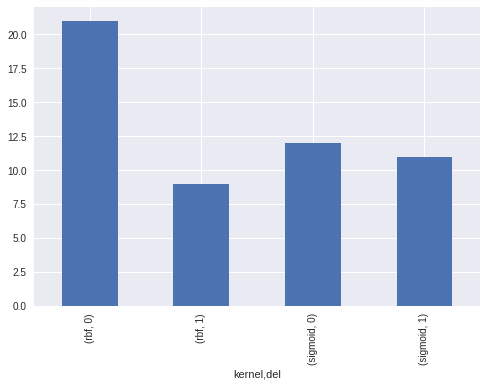

In [41]:
df_all.groupby(['kernel', 'del'])['del'].count().plot(kind='bar')

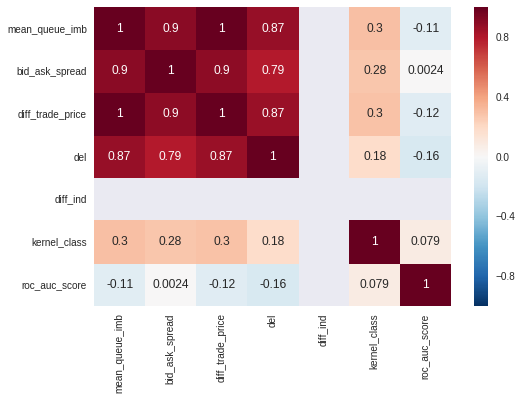

In [42]:

sns.heatmap(df_all[features + ['del', 'diff_ind', 'kernel_class', 'roc_auc_score' ]].corr(), 
            annot=True)

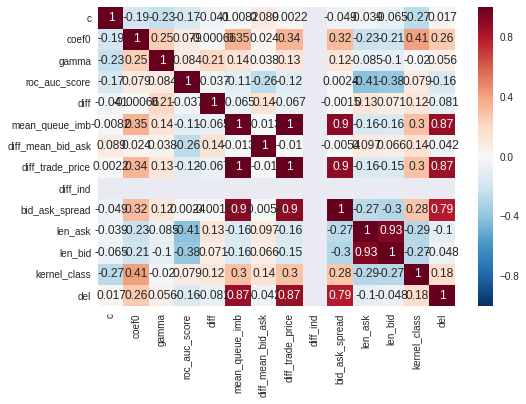

In [43]:
features = ['c', 'coef0', 'gamma', 'roc_auc_score', 'diff', 'mean_queue_imb',
            'diff_mean_bid_ask', 'diff_trade_price', 'diff_ind',
            'bid_ask_spread', 'len_ask', 'len_bid', 'kernel_class', 'del']
sns.heatmap(df_all[features].corr(), annot=True)

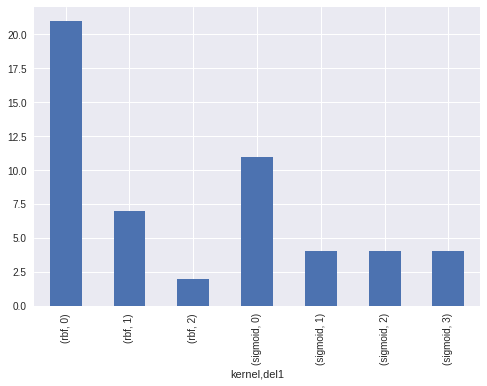

In [46]:
from sklearn.cluster import SpectralClustering, MeanShift, AffinityPropagation 
from sklearn.decomposition import PCA
a_features = ['len_bid', 'len_ask', 'bid_ask_spread',  'mean_queue_imb',
            'max_trade_price', 'min_trade_price', 'sum_sell_ask_mean',
           'sum_buy_bid_mean']
features = [ 'mean_queue_imb', 'bid_ask_spread', 'diff_trade_price']

X = df_all[features]

kmeans = MeanShift().fit_predict(X)
df_all['del1'] = kmeans
df_all.groupby(['kernel', 'del1'])['del1'].count().plot(kind='bar')

### Check bad ones

In [35]:
f = ['sum_sell_ask_mean', 'sum_buy_bid_mean',
       'diff_mean_bid_ask', 'max_trade_price', 'min_trade_price',
       'diff_trade_price', 'bid_ask_spread',
       'len_ask', 'len_bid', 'data_len']
worst_row = df_all[f][df_all['diff'] < 0]
worst_stocks = worst_row.index
worst_row

,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,len_ask,len_bid,data_len
stock,,,,,,,,,,


In [36]:
df_all[f].describe()

,sum_sell_ask_mean,sum_buy_bid_mean,diff_mean_bid_ask,max_trade_price,min_trade_price,diff_trade_price,bid_ask_spread,len_ask,len_bid,data_len
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0
mean,5466.772088,5502.519950,-35.747862,1451.683019,1269.636981,182.046038,0.752372,1272.452830,1252.566038,6000.0
std,7663.059801,7686.609595,789.063883,1374.421688,1195.492657,188.190380,0.761499,559.274034,504.072664,0.0
min,243.609667,275.420833,-1685.039000,79.850000,73.210000,6.640000,0.025982,600.000000,591.000000,6000.0
25%,1676.817500,1742.032833,-318.698833,378.000000,339.500000,40.950000,0.205900,879.000000,884.000000,6000.0
50%,3453.283500,3551.209500,-60.278167,535.000000,463.100000,67.600000,0.296683,1101.000000,1115.000000,6000.0
75%,6001.775667,5582.852000,79.397000,2712.000000,2313.000000,287.000000,1.040750,1409.000000,1478.000000,6000.0
max,44824.330333,46031.619833,4095.270333,4951.000000,4257.000000,694.000000,3.488667,3016.000000,2584.000000,6000.0


In [37]:
list(df_bests[df_bests['diff'] < 0.005]['stock'])

['10166',
 '10508',
 '10887',
 '11867',
 '12059',
 '12417',
 '13003',
 '1388',
 '1472',
 '2813',
 '3035',
 '4060',
 '4320',
 '4549',
 '4618',
 '5836',
 '9058',
 '9067',
 '9086',
 '9269']

In [47]:
df_bests['diff'].mean()

0.007039528709400749

In [48]:
df_bests['diff'].median()

0.005804784434437216

In [49]:
df_bests['diff'].std()

0.005082528130870387

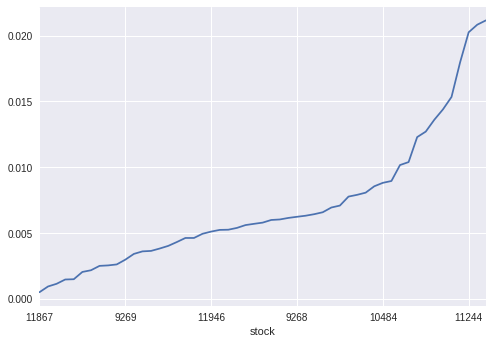

In [51]:
df_bests['diff'].sort_values().plot()

### 10484

In [58]:
print(worst_stocks)
if not np.any(worst_stocks):
    worst_stocks = list(df_bests[df_bests['diff'] < 0.002]['stock'])

Index([], dtype='object', name='stock')


[]

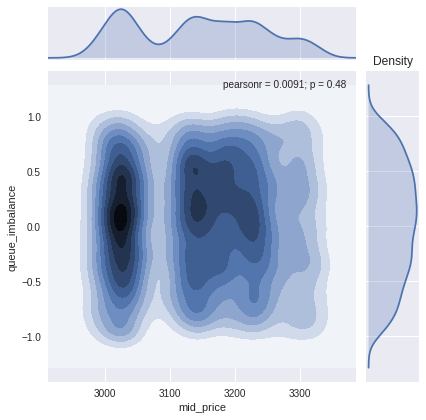

In [76]:
s = worst_stocks[0]
sns.jointplot(x="mid_price", y="queue_imbalance", data=dfs[s].loc[:, ['mid_price', 'queue_imbalance']], kind="kde")
plt.title('Density')
plt.plot()

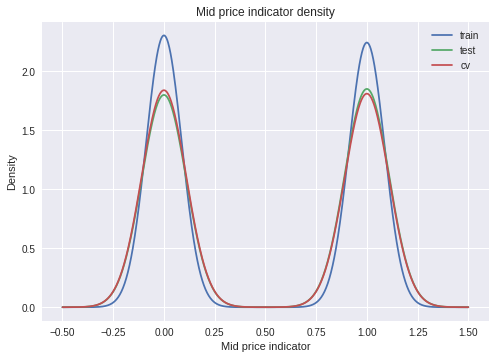

In [77]:
s = worst_stocks[0]
dfs[s]['mid_price_indicator'].plot('kde', label='train')
dfs_test[s]['mid_price_indicator'].plot('kde', label='test')
dfs_cv[s]['mid_price_indicator'].plot('kde', label='cv')
plt.legend()
plt.xlabel('Mid price indicator')
plt.title('Mid price indicator density')

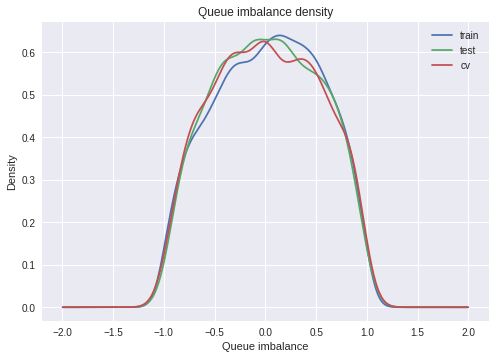

In [78]:
s = worst_stocks[0]

dfs[s]['queue_imbalance'].plot('kde', label='train')
dfs_test[s]['queue_imbalance'].plot('kde', label='test')
dfs_cv[s]['queue_imbalance'].plot('kde', label='cv')
plt.legend()
plt.xlabel('Queue imbalance')
plt.title('Queue imbalance density')

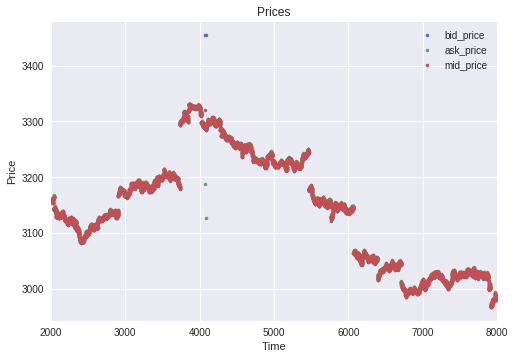

In [79]:
dfs[s][['bid_price', 'ask_price', 'mid_price']].plot(style='.')
plt.legend()
plt.title('Prices')
plt.xlabel('Time')
plt.ylabel('Price')

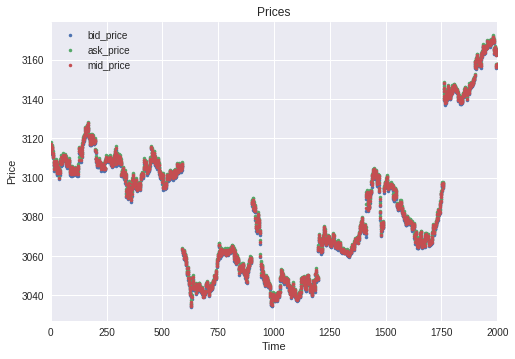

In [80]:
dfs_test[s][['bid_price', 'ask_price', 'mid_price']].plot(style='.')
plt.legend()
plt.title('Prices')
plt.xlabel('Time')
plt.ylabel('Price')

In [65]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm
# from sklearn.neighbors import KernelDensity
# s = worst_stocks[0]
# X = dfs[s]['queue_imbalance'].reshape(-1, 1)
# kde = KernelDensity(kernel='gaussian').fit(X)
# log_dens = kde.score_samples(X)
# print(log_dens)
# plt.scatter(dfs[s].index, np.exp(log_dens))
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# x =  dfs[s]['queue_imbalance'].values
# y = dfs[s]['mid_price_indicator'].values

#x, y = np.meshgrid(np.exp(log_dens), dfs[s]['queue_imbalance'].values)

#ax.plot_surface(x, y, dfs[s].index)


[-1.2046617  -1.05934191 -1.12460682 ..., -1.34868178 -1.04662877
 -1.07412053]


In [68]:
best_stocks = list(df_bests[df_bests['diff'] > 0.015]['stock'])
best_stocks

['11244', '1907', '3022', '9074', '9761']

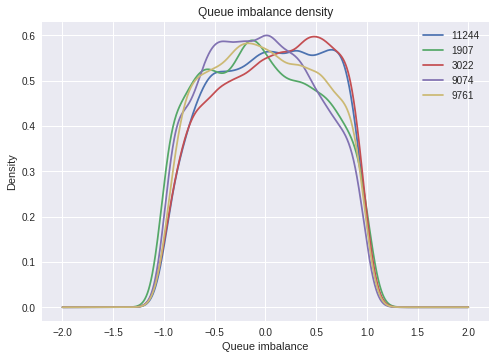

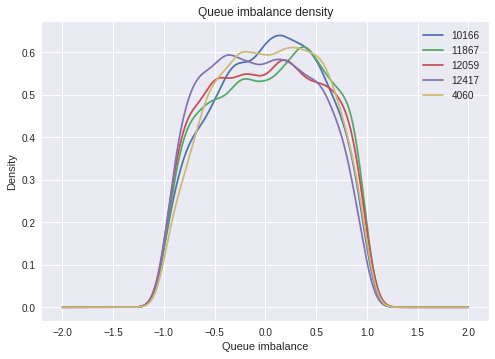

In [81]:
for s in best_stocks:
    dfs[s]['queue_imbalance'].plot('kde', label=s)
    plt.legend()
    plt.xlabel('Queue imbalance')
plt.title('Queue imbalance density')
plt.figure()

for s in worst_stocks:
    dfs[s]['queue_imbalance'].plot('kde', label=s)
    plt.legend()
    plt.xlabel('Queue imbalance')
plt.title('Queue imbalance density')

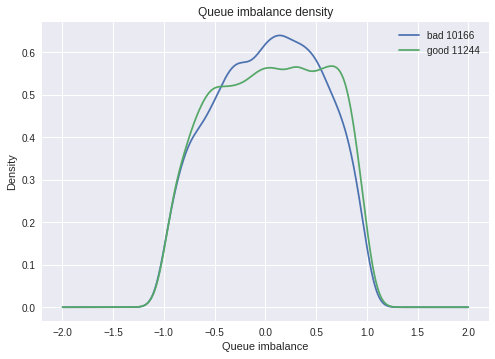

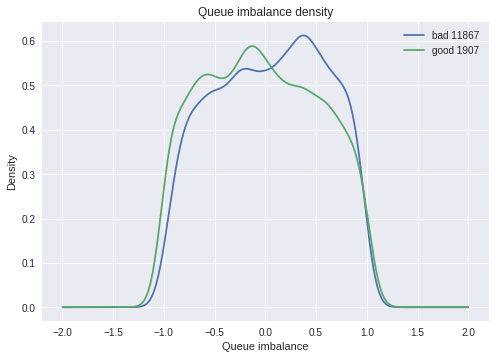

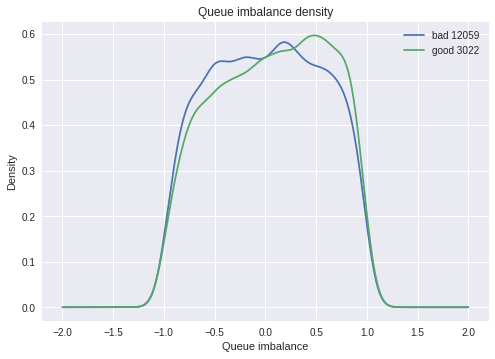

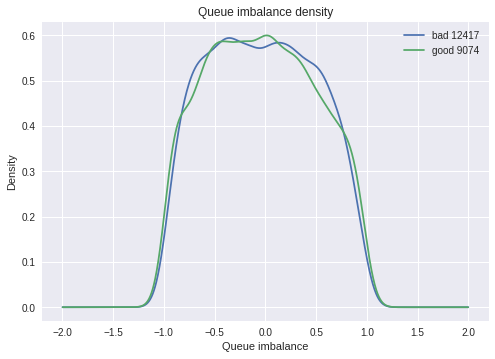

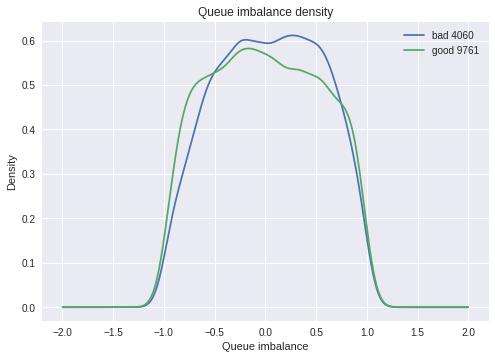

In [83]:
for s1, s2 in zip(best_stocks, worst_stocks):
    dfs[s2]['queue_imbalance'].plot('kde', label='bad ' + s2)
    dfs[s1]['queue_imbalance'].plot('kde', label='good ' + s1)
    plt.legend()
    plt.xlabel('Queue imbalance')
    plt.title('Queue imbalance density')
    plt.figure()

In [95]:
features = [ 'max_trade_price', 'diff', 'min_trade_price',
            'mean_queue_imb', 'len_ask', 'len_bid']
df_all[features][df_all['diff'] > 0.015]

,max_trade_price,diff,min_trade_price,mean_queue_imb,len_ask,len_bid
stock,,,,,,
11244,355.5,0.020254,325.0,57.133036,3016,2584
1907,215.9,0.020828,187.3,51.352991,967,1035
3022,416.2,0.021153,380.1,67.196371,1043,1122
9074,2183.0,0.015342,1977.0,391.315156,1045,995
9761,1058.0,0.017970,943.5,214.830378,1121,1044


In [96]:
df_all[df_all['diff'] < 0.002][features]

,max_trade_price,diff,min_trade_price,mean_queue_imb,len_ask,len_bid
stock,,,,,,
10166,3454.5,0.001488,2968.5,951.170098,1222,1446
11867,409.5,0.000524,361.5,89.811778,872,936
12059,383.5,0.001509,349.4,63.832607,1575,1842
12417,323.2,0.001163,287.8,68.830859,617,591
4060,378.0,0.000959,336.4,82.139179,1034,888


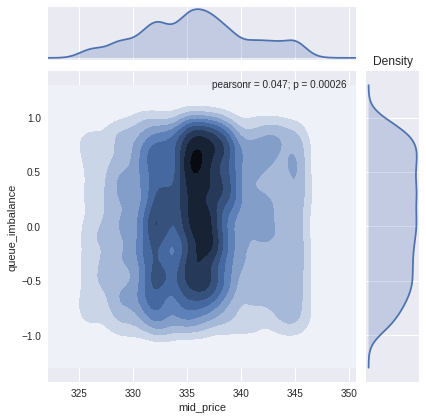

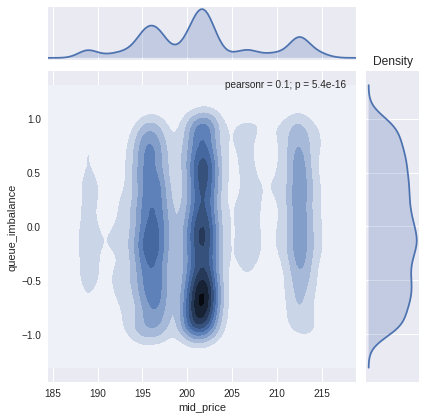

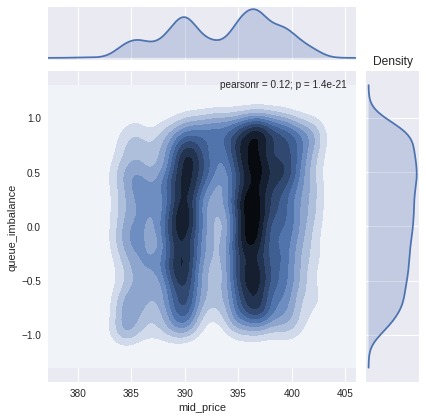

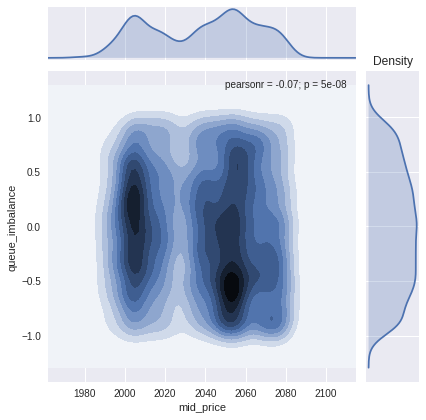

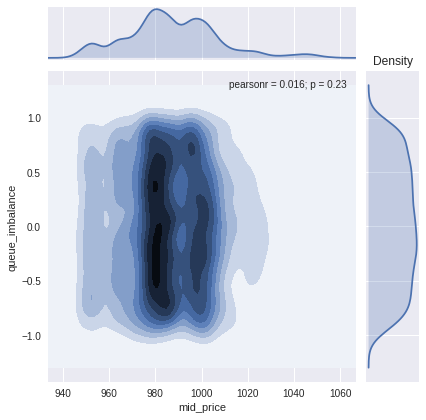

In [112]:
for s in best_stocks:
    sns.jointplot(x="mid_price", y="queue_imbalance", data=dfs[s].loc[:, ['mid_price', 'queue_imbalance']], kind="kde")
    plt.title('Density')
    plt.plot()
    plt.figure()

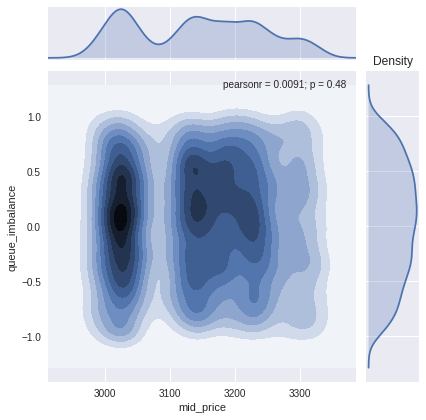

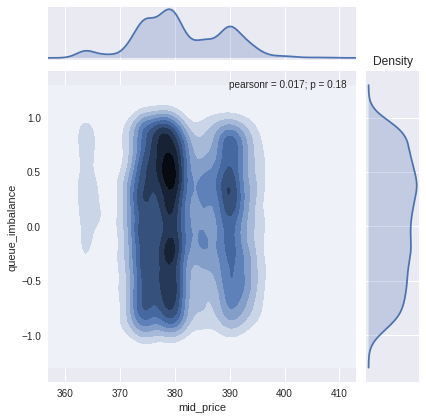

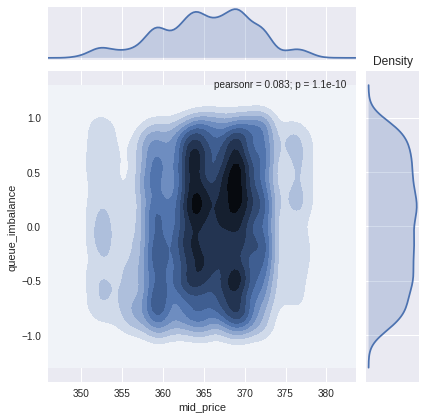

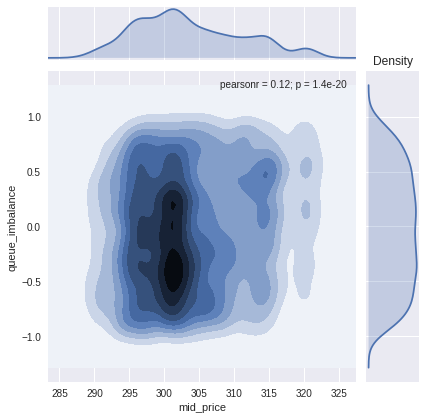

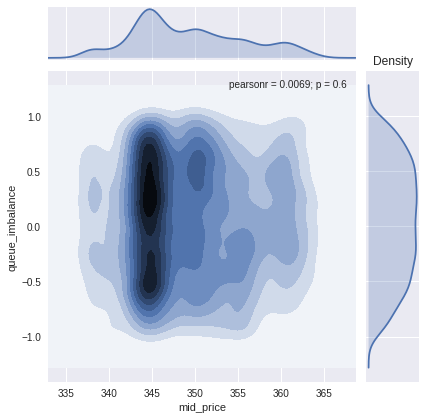

In [113]:
for s in worst_stocks:
    sns.jointplot(x="mid_price", y="queue_imbalance", data=dfs[s].loc[:, ['mid_price', 'queue_imbalance']], kind="kde")
    plt.title('Density')
    plt.plot()
    plt.figure()